In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data_science_python.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
df.shape

(607, 12)

In [6]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop(['Unnamed: 0','salary'],axis=1,inplace=True)

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [24]:
df1=df.groupby('work_year')['salary_in_usd'].mean()
df1

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

In [27]:
data={'work_year':df1.index,'average_salary':df1.values}
df1=pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


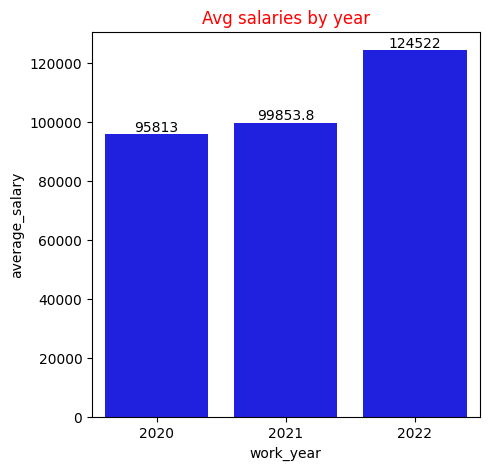

In [42]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x='work_year',y='average_salary',data=df1,color='b')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Avg salaries by year',color='r')
plt.show()

In [45]:
df2=df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [47]:
labels=['Fully_remote','No_remote','Partially_remote']
values=df2.values

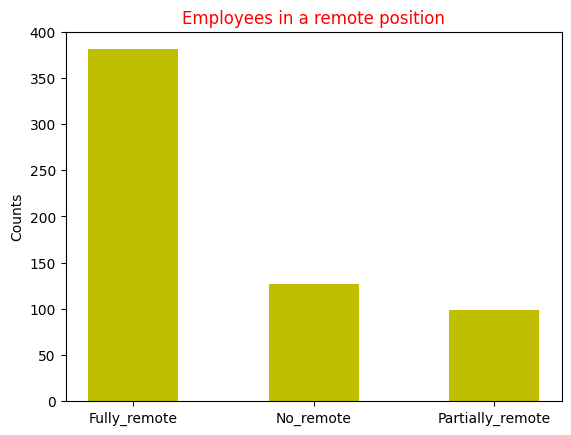

In [54]:
plt.bar(labels,values,width=0.5,color='y')
plt.ylabel('Counts')
plt.title('Employees in a remote position',color='r')
plt.show()

In [55]:
df.company_size.value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [57]:
x=df.company_size.value_counts().index
y=df.company_size.value_counts().values

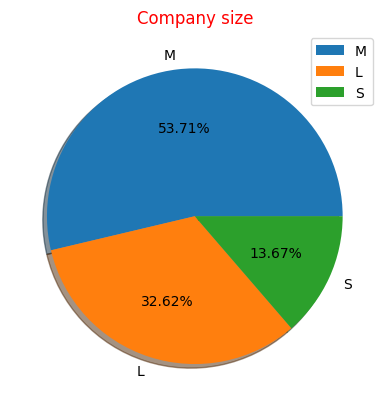

In [71]:
plt.pie(y,data=df,autopct='%0.2f%%',labels=x,shadow=True)
plt.legend()
plt.title('Company size',color='r')
plt.show()

In [81]:
df3=df.job_title.value_counts()[:5]
df3

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

In [82]:
data1={'job_title':df3.index,'count':df3.values}
df3=pd.DataFrame(data1)
df3

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


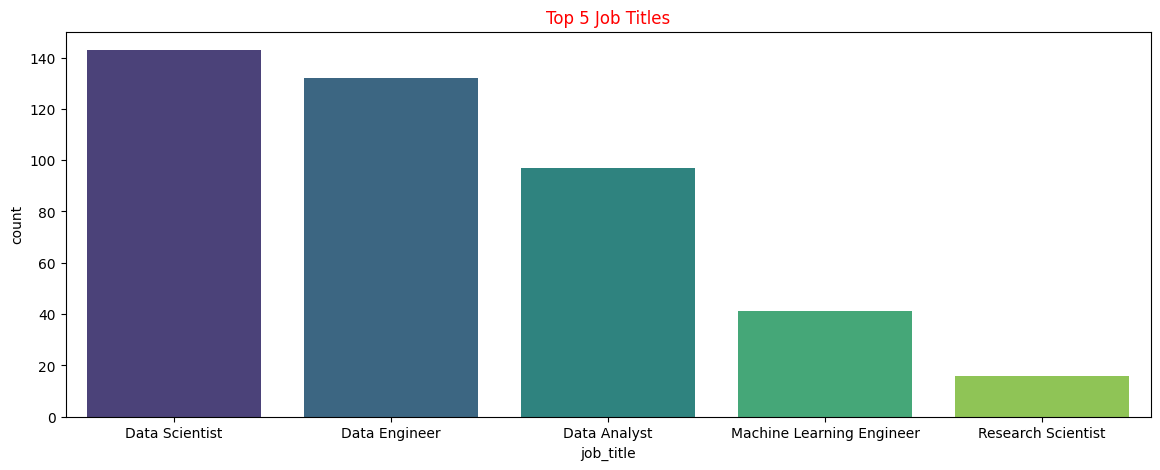

In [93]:
plt.figure(figsize=(14,5))
sns.barplot(x='job_title',y='count',data=df3,palette='viridis')
plt.title('Top 5 Job Titles',color='r')
plt.show()

In [94]:
df4=df[['salary_in_usd','company_size']]
df4

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [104]:
S=df4[df4['company_size']=='S']
M=df4[df4['company_size']=='M']
L=df4[df4['company_size']=='L']
labels=['Medium','Large','Small']
sal_mean=[S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()]
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

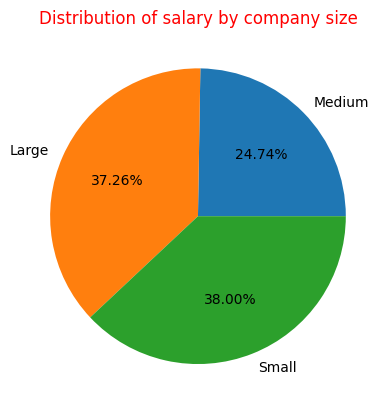

In [106]:
plt.pie(sal_mean,labels=labels,autopct='%0.2f%%')
plt.title('Distribution of salary by company size',color='r')
plt.show()

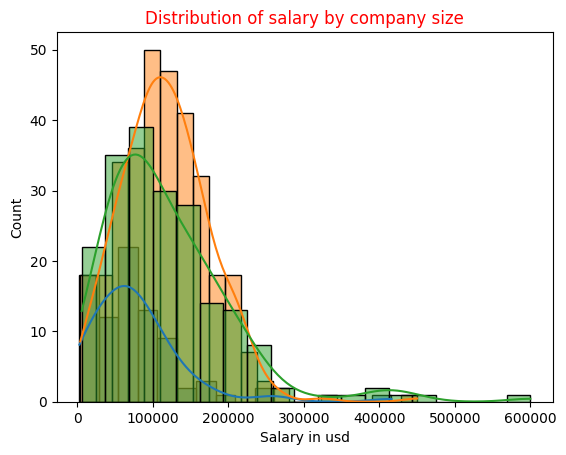

In [112]:
sns.histplot(S['salary_in_usd'],kde=True,label='Small')
sns.histplot(M['salary_in_usd'],kde=True,label='Medium')
sns.histplot(L['salary_in_usd'],kde=True,label='Large')
plt.title('Distribution of salary by company size',color='r')
plt.xlabel('Salary in usd')
plt.show()

In [114]:
df5=df.experience_level.value_counts()
df5

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [115]:
exp_level={'SE':'Senior','MI':'Middle','EN':'Entry level','EX':'Executive'}
df['experience_level'].replace(exp_level,inplace=True)

In [117]:
df5=df.experience_level.value_counts()
df5

experience_level
Senior         280
Middle         213
Entry level     88
Executive       26
Name: count, dtype: int64

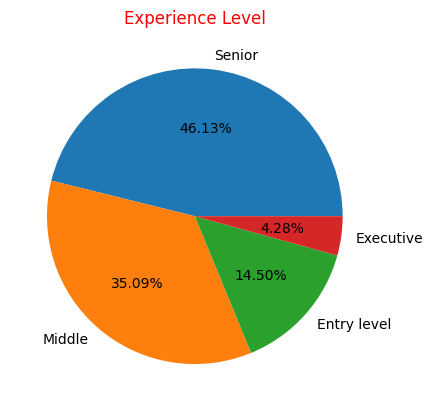

In [120]:
x=df5.index
y=df5.values
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.title('Experience Level',color='r')
plt.show()